In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

token = '18084cb8c91eee736662c2f23065983acf97af6734e14355c78b8e424c4d0f480efc8b254aff7586b13810c48eb71baf384d26bc382aad7017cec64e857fbae3'

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='yonsei-dedicated/internal/ymsphdcandid',
    token=token
)

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='yonsei-dedicated/internal/ymsphdcandid', token='<IBM Quantum API key>')

In [2]:
from QPCA.decomposition.Qpca import QPCA
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import pickle 
from QPCA.preprocessingUtilities.preprocessing import generate_matrix
from QPCA.benchmark.benchmark import *

In [3]:
seed=7000
resolutions=[8]
matrix_dimension=4
eigenvalues_list=[0.65,0.25,0.06,0.04]
input_matrix=generate_matrix(matrix_dimension=matrix_dimension,replicate_paper=False,seed=seed,eigenvalues_list=eigenvalues_list)
shots_numbers=[1000000]

Matrix:
 [[0.37 0.18 0.12 0.12]
 [0.18 0.17 0.08 0.09]
 [0.12 0.08 0.13 0.15]
 [0.12 0.09 0.15 0.33]]

eigenvalue: 0.03999999999999997 - eigenvector: [ 0.043  0.284 -0.892  0.348]
eigenvalue: 0.059999999999999866 - eigenvector: [-0.5    0.833  0.182 -0.152]
eigenvalue: 0.24999999999999978 - eigenvector: [-0.564 -0.241  0.194  0.765]
eigenvalue: 0.6499999999999997 - eigenvector: [-0.656 -0.409 -0.364 -0.52 ]


In [10]:
import time

start_time = time.time()  # 시작 시간 기록

qpca = QPCA().fit(input_matrix, resolution=8)

end_time = time.time()    # 종료 시간 기록
elapsed_time = end_time - start_time

print(f"fit 메서드 실행 시간: {elapsed_time}초")

fit 메서드 실행 시간: 0.9588556289672852초


In [8]:
import time
from sklearn.decomposition import PCA

data = [
    [0.37, 0.18, 0.12, 0.12],
    [0.18, 0.17, 0.08, 0.09],
    [0.12, 0.08, 0.13, 0.15],
    [0.12, 0.09, 0.15, 0.33]
]

pca = PCA()

start_time = time.time()  # 시작 시간 기록
pca.fit(data)             # PCA fit 수행
end_time = time.time()    # 종료 시간 기록

elapsed_time = end_time - start_time
print(f"PCA fit 실행 시간: {elapsed_time}초")


PCA fit 실행 시간: 0.0010056495666503906초




Resolution:  8




You set an absolute tolerance of 1e-06. If some output eigenvalues are not the expected ones, it is recommended to increase the absolute tolerance to cut away the noisy eigenvalues.


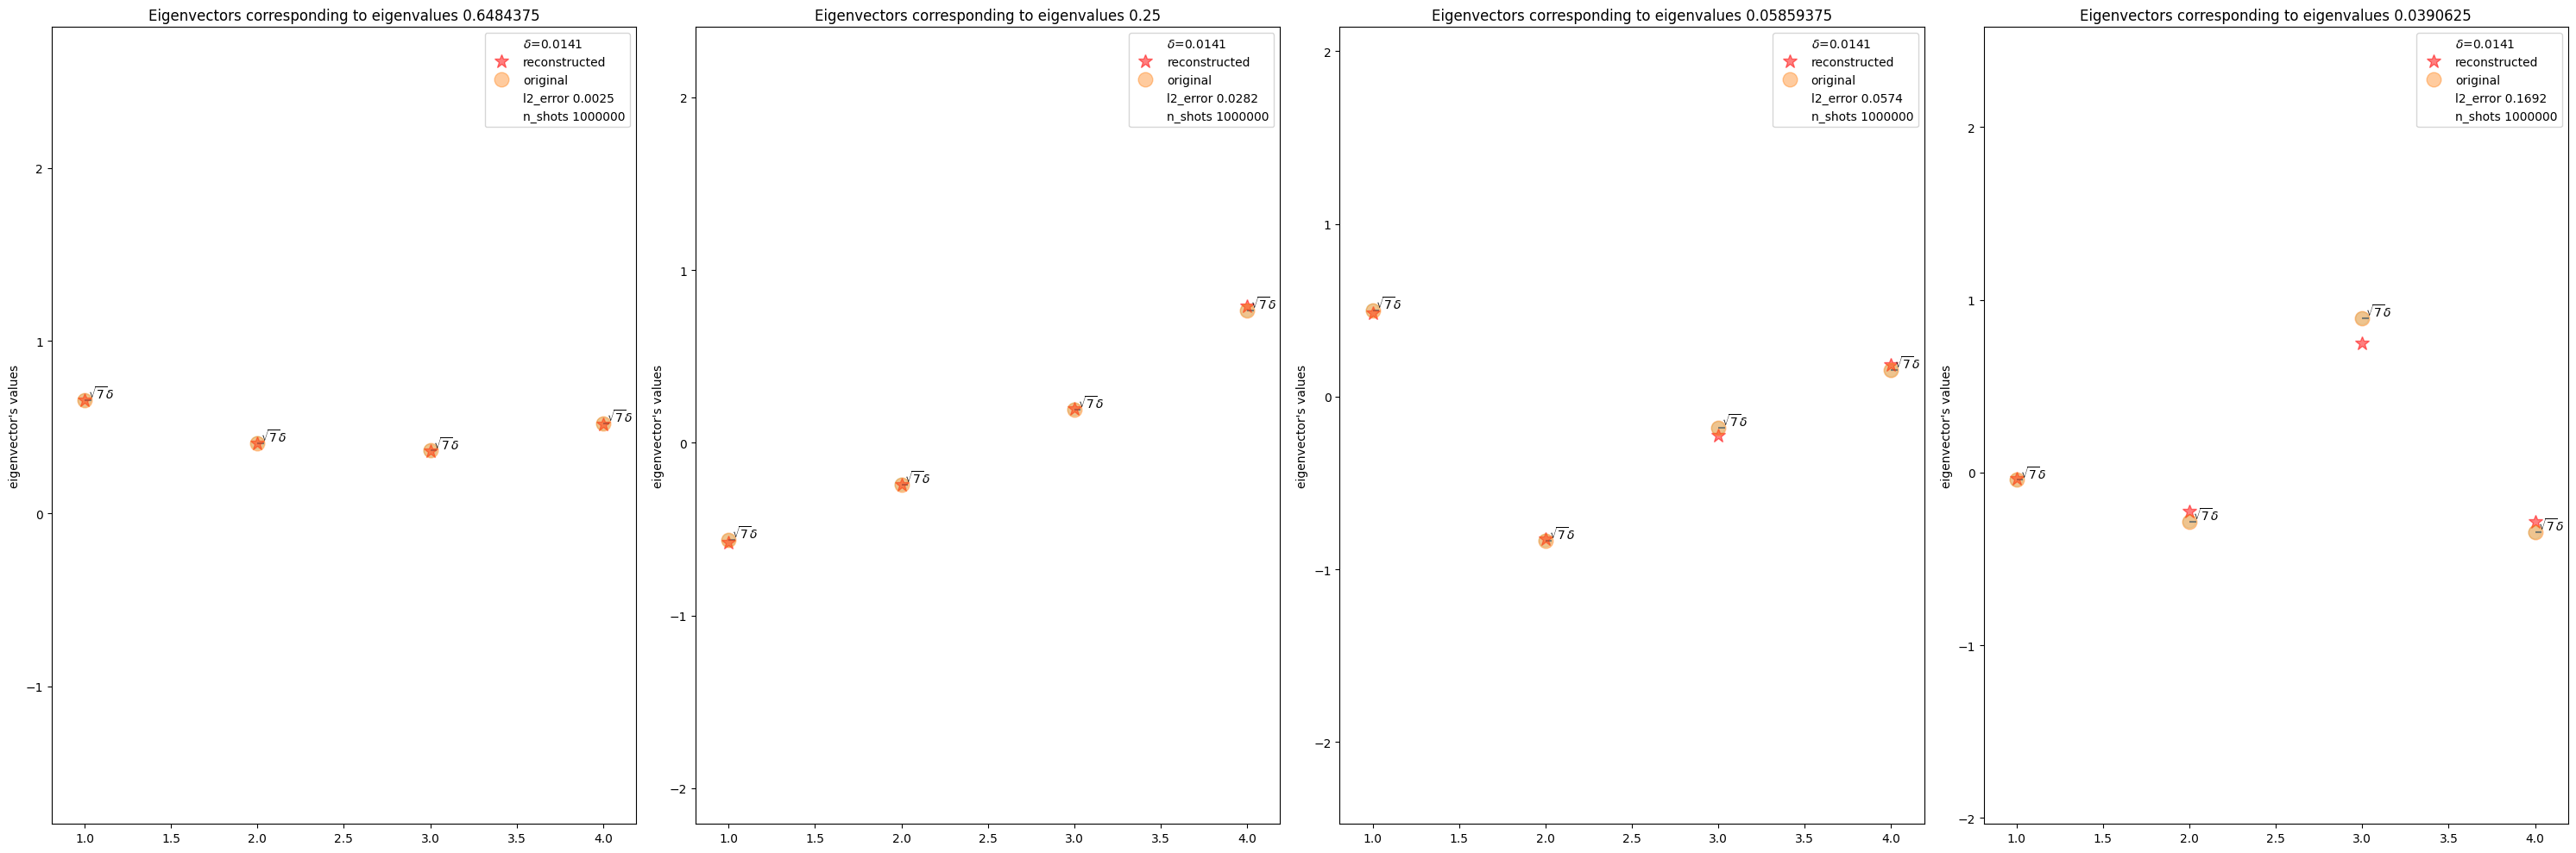

In [10]:
for resolution in resolutions:
    qpca=QPCA().fit(input_matrix,resolution=resolution)
    print('\n')
    print('\033[1m'+'Resolution: ',resolution)
    print('\n')
    for s in shots_numbers:
        reconstructed_eigenvalues,reconstructed_eigenvectors=qpca.eigenvectors_reconstruction(n_shots=s,n_repetitions=1)
        results=qpca.spectral_benchmarking(eigenvector_benchmarking=True,sign_benchmarking=False ,eigenvalues_benchmarching=False,print_distances=True,only_first_eigenvectors=False,
                                                        plot_delta=True,distance_type='l2',error_with_sign=True,hide_plot=False,print_error=False)
        #eig_evec_tuple,delta

In [11]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip list

Package                       Version
----------------------------- -----------
alabaster                     0.7.13
annotated-types               0.7.0
anyio                         4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asteval                       1.0.5
asttokens                     2.0.5
async-lru                     2.0.4
attrs                         23.1.0
audioread                     3.0.0
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.12.3
bleach                        4.1.0
Brotli                        1.0.9
certifi                       2024.12.14
cffi                          1.15.1
charset-normalizer            3.3.2
colorama                      0.4.6
comm                          0.2.1
contourpy                     1.1.1
cryptography                  44.0.0
cycler                        0.12.1
debugpy                       1.6.7
decora